# Prerequisites

- Here you start

# Theory and code

- [3blue1brown Linear algebra](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab ) - Highly recommended
- This notebook follows this [introductory material](https://www.researchgate.net/publication/340583330_Lightweight_Introduction_to_Lattices) 

## Equations

*Intuition*: Describe relationships between objects

**Examples**

$$
x + 2x^2 + x = 0 \\
x + x^2 + x^3 = 0
$$

In [1]:
x = var('x', domain=ZZ)
eq1 = x + 2*x**2 + x**3
eq2 = x + x**2 + x**3
print(eq1)
print(eq2)

x^3 + 2*x^2 + x
x^3 + x^2 + x


In [2]:
solve(eq1 == 0, x)

[-1, 0]

## Systems of equations

Consider $x+y = 10$. Notice that there are infinite solutions for this equation. Sage represents this with `t_0`
```x = t_0
y = -t_0 + 10```

In [3]:
x = var('x', domain = ZZ)
y = var('y', domain = ZZ)

In [4]:
solve(x+y==10, (x,y))

(t_0, -t_0 + 10)

If we put more restrictions we might get to an actual value
$\begin{cases}
x + y = 0 \\
x = y
\end{cases}$

In [5]:
solve([x + y==10,
       x == y],
      (x,y))

[[x == 5, y == 5]]

Another example: $\begin{cases}
2x + y = 15 \\
x +y+z = 20 \\
3z = 30
\end{cases}$

In [6]:
x = var('x', domain = ZZ)
y = var('y', domain = ZZ)
z = var('z', domain = ZZ)

In [7]:
solve([2*x + y == 15,
      x + y + z == 20,
      3 * z == 30],
     (x, y, z))

[[x == 5, y == 5, z == 10]]

## Matrices

$M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
$

We can represent system of equations using matrices

https://en.wikipedia.org/wiki/Row_echelon_form

In [8]:
M = matrix([[1, 2, 3],
           [4, 5, 6]])
print(M)

[1 2 3]
[4 5 6]


## Vectors

**Vectors - Def**  
One dimensional measure of quantity with multiple components $v = (v_0, v_1, ...)$

**Addition**
- Componentwise
- $x + y = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} = \begin{bmatrix} x_1+y_1 \\ x_2+y_2 \end{bmatrix}$

**Scalar multiplication**
- Multiply the scalar with each component
- $kx = \begin{bmatrix} kx_1 \\ kx_2 \end{bmatrix}$

**Norm (length)**
- For a vector $x \in \mathbb{R}^n, x = (x_1,...,x_n)$ the norm is defined as $$\|x\| = \sqrt{x_1^2  + x_2^2 + ... + x_n^2}$$

**Dot product**
- For $x = (x_1, ... x_n), y = (y_1, ..., y_n)$ we define the dot product:
$$x \cdot y = x_1y_1 + x_2y_2 + ... + x_ny_n$$

**Orthogonality**
- If $x \cdot y = 0$ then $x$ is orthogonal to $y$

**Unit vector**  
Vector divided by its norm -- $u = \dfrac {1} {\|v\|} \cdot v$ is a **unit vector**

In [9]:
v1 = vector([0, 1, 3])
v2 = vector([3, 6, 2])
print(v1 + v2)
print(2 * v2)
print(v2.norm()) #sqrt(49)

##Inner product
print(v1 * v2, v1.inner_product(v2))

(3, 7, 5)
(6, 12, 4)
7
12 12


## Equations and matrices

$\begin{cases}
96x_1 + 11x_2  + 101x_3= 634 \\
97x_1 + 15 x_2 + 99x_3 = 637 \\
88x_1 + 22x_2 + 100x_3 = 654
\end{cases}$

We can write the above system of equations as:
$\begin{bmatrix}
96 & 11 & 101 \\
97 & 15 & 99\\
88& 22 & 100\\
\end{bmatrix}
\cdot
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}
=
\begin{bmatrix} 634 \\ 637 \\ 654 \end{bmatrix}
$


In [10]:
A = matrix([
    [96, 11, 101],
    [97, 15, 99],
    [88, 22, 100]
])
b = vector([634, 637, 654])
B = A.augment(b)
B

[ 96  11 101 634]
[ 97  15  99 637]
[ 88  22 100 654]

In [11]:
B.rref() #Row reduced echelon form => x1 = 1, x2 = 3, x3 = 5

[1 0 0 1]
[0 1 0 3]
[0 0 1 5]

In [13]:
x = A.solve_right(b)
x

(1, 3, 5)

In [19]:
A * x == b

True

## Vector spaces

- [Wikipedia entry](https://en.wikipedia.org/wiki/Vector_space) - Read about the proprieties and definition from here

**Example**
- Polynomials with real coefficients are a vector space

**Vector subspace**  
[WIkipedia entry](https://en.wikipedia.org/wiki/Linear_subspace).
$U$ is a subspace if it's a vector space over the same field with the inherited operations => Closed under addition and scalar multiplication.


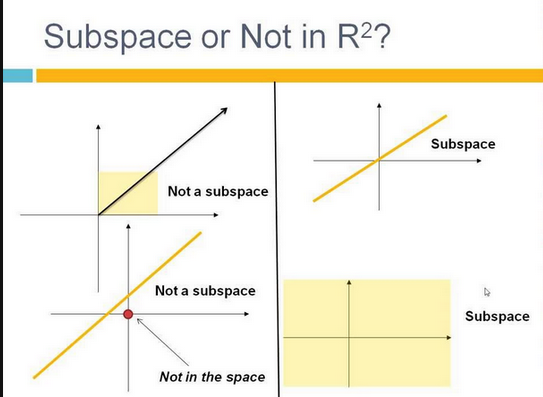
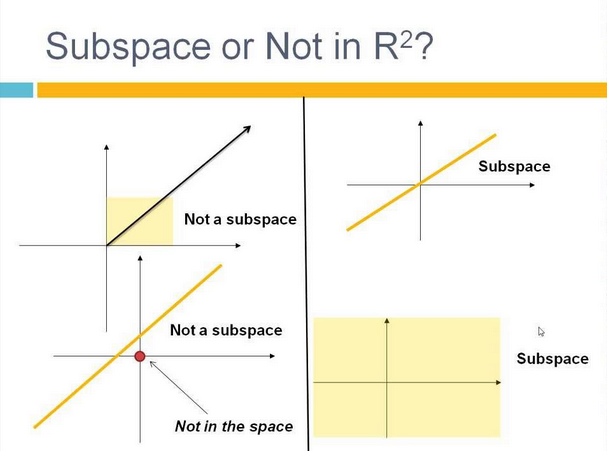

**Span**
- The span of a subset $S$ of $V$ is the set of all linear combinations of vectors from $S$
- $span(S) =\{c_1 \vec{v_1}+...+c_n\vec{v_n}|c_i∈\mathbb{R}, \vec{v_i}∈S\}$

In [20]:
V = VectorSpace(RR, 3)
V.basis()

[
(1.00000000000000, 0.000000000000000, 0.000000000000000),
(0.000000000000000, 1.00000000000000, 0.000000000000000),
(0.000000000000000, 0.000000000000000, 1.00000000000000)
]

In [21]:
S = V.subspace([V([1., 0., 0.]),
              V([0., 1., 0.])])

In [22]:
S

Vector space of degree 3 and dimension 2 over Real Field with 53 bits of precision
Basis matrix:
[ 1.00000000000000 0.000000000000000 0.000000000000000]
[0.000000000000000  1.00000000000000 0.000000000000000]

In [23]:
S.dimension(), V.dimension()

(2, 3)

# Resources

- [Sage docs](https://doc.sagemath.org/html/en/constructions/linear_algebra.html)
- https://www.researchgate.net/publication/340583330_Lightweight_Introduction_to_Lattices